In [136]:
# 올림픽 20회 ~ 27회까지 역대 순위 그래프로 그리기
# url : https://gsic.sports.or.kr/com/cop/game/game_info.do?partCode=1&gameCode=27 (회차별로 20~27)


In [137]:
# 1) url에서 27회 메인페이지 불러와서 출력해본다.
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
url = "https://gsic.sports.or.kr/com/cop/game/game_info.do?partCode=1&gameCode=27"
response = urlopen(url)
soup = BeautifulSoup(response,"html.parser")
print(soup.prettify())
#response.status

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html lang="ko">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <title>
   국제스포츠정보센터
  </title>
  <link href="/images/sports.new/img/common/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/css/sports/css/main.css;jsessionid=eck8uqoG6F7h-kDNoR0JqoQbUaPXSEBvlTSjaJacBoQx5ak6o9GP!308699489" rel="stylesheet" type="text/css"/>
  <link href="/css/sports/css/common.css;jsessionid=eck8uqoG6F7h-kDNoR0JqoQbUaPXSEBvlTSjaJacBoQx5ak6o9GP!308699489" rel="stylesheet" type="text/css"/>
  <script src="/js/common/jquery-3.1.1.js;jsessionid=eck8uqoG6F7h-kDNoR0JqoQbUaPXSEBvlTSjaJacBoQx5ak6o9GP!308699489" type="text/javascript">
  </script>
 </head>
 <script type="text/javascript">
  if(top != window) {

        top.location = window.location;

    }
 </script>
 <script type="text/javascript">
  

In [138]:
# 2) 1위~10위 국가의 정보를 "rank" "nation" "gold" "silver" "bronze" "total"을 각각 가져와본다.
rank = []
nation = []
gold = []
silver = []
bronze = []
total = []
info_list = soup.tbody.findAll("tr")
#end = len(info_list)
for i in range(10):
    tmp = info_list[i].findAll("td")
    rank.append(tmp[0].text)
    nation.append(tmp[1].text)
    gold.append(tmp[2].text)
    silver.append(tmp[3].text)
    bronze.append(tmp[4].text)
    total.append(tmp[5].text)

In [139]:
# 각 정보의 길이 10개인지 확인
len(rank), len(nation), len(gold),len(silver),len(bronze),len(total)

(10, 10, 10, 10, 10, 10)

In [140]:
# 반복문에서 url 수정을 통해 자동으로 정보를 얻어와본다.
## tqdm으로 진행률 체크
## 20~27까지 url 포맷 변경해서 자동화
## tr td 속성 가져오기
from tqdm import tqdm
olympic = []
rank = []
nation = []
gold = []
silver = []
bronze = []
total = []

num_list = [ n for n in range(20,28)]

for num in tqdm(num_list):
    url = "https://gsic.sports.or.kr/com/cop/game/game_info.do?partCode=1&gameCode={cnt}"
    response = urlopen(url.format(cnt=num))
    soup = BeautifulSoup(response, "html.parser")
    
    info_list = soup.tbody.findAll("tr")
    for i in range(10):
        olympic.append(num)
        tmp = info_list[i].findAll("td")
        #print(tmp[1].text)
        rank.append(tmp[0].text)
        nation.append(tmp[1].text)
        gold.append(tmp[2].text)
        silver.append(tmp[3].text)
        bronze.append(tmp[4].text)
        total.append(tmp[5].text)



100%|██████████| 8/8 [00:04<00:00,  1.71it/s]


In [141]:
# 각 리스트 길이 확인
len(rank), len(nation), len(total)

(80, 80, 80)

In [142]:
# 얻은 정보로 데이터프레임생성
import pandas as pd
data = pd.DataFrame({
    "회차" : olympic,
    "순위" : rank,
    "국가" : nation,
    "금메달" : gold,
    "은메달" : silver,
    "동메달" : bronze,
    "합계" : total
})
data.tail()

,회차,순위,국가,금메달,은메달,동메달,합계
75,27,6,프랑스,13,14,11,38
76,27,7,이탈리아,13,8,13,34
77,27,8,네덜란드,12,9,4,25
78,27,9,쿠바,11,11,7,29
79,27,10,영국,11,10,7,28


In [143]:
#금은동 합계 int형으로 수정
# info확인
data["금메달"] = data["금메달"].astype(int)
data["은메달"] = data["은메달"].astype(int)
data["동메달"] = data["동메달"].astype(int)
data["합계"] = data["합계"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회차      80 non-null     int64 
 1   순위      80 non-null     object
 2   국가      80 non-null     object
 3   금메달     80 non-null     int32 
 4   은메달     80 non-null     int32 
 5   동메달     80 non-null     int32 
 6   합계      80 non-null     int32 
dtypes: int32(4), int64(1), object(2)
memory usage: 3.2+ KB


In [144]:
#그래프 그릴 수 있게 import 및 전처리코드작성
import matplotlib.pyplot as plt
from matplotlib import rc
rc("font", family="Malgun Gothic")
get_ipython().run_line_magic("matplotlib", "inline")

In [145]:
data.pivot_table(
    index=["회차","국가"],
    values=["순위","합계","금메달","은메달","동메달"]
)

금메달  동메달  은메달  합계
회차 국가                     
20 동독     20   23   23  66
   미국     33   30   31  94
   불가리아    6    5   10  21
   서독     13   16   11  40
   소련     50   22   27  99
...      ...  ...  ...  ..
27 이탈리아   13   13    8  34
   중국     28   15   16  59
   쿠바     11    7   11  29
   프랑스    13   11   14  38
   호주     16   17   25  58

[80 rows x 4 columns]

In [146]:
# 미국의 순위를 알아보고 참여하지 않은 회차를 구하라

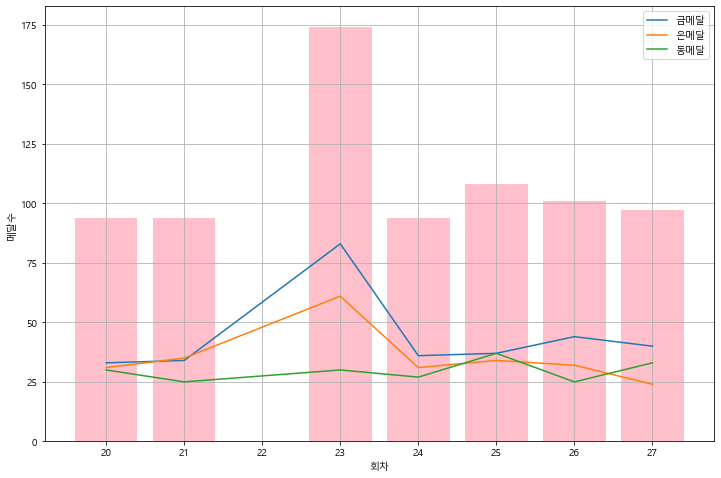

In [147]:
# 미국의 회차별 순위 및 메달변동
america_info = data.query("국가==['미국']")
plt.figure(figsize=(12,8))
plt.plot(america_info["회차"],america_info["금메달"])
plt.plot(america_info["회차"],america_info["은메달"])
plt.plot(america_info["회차"],america_info["동메달"])
plt.bar(america_info["회차"],america_info["합계"], color="pink")
plt.grid(True)
plt.xlabel("회차")
plt.ylabel("메달수")
plt.legend(["금메달","은메달","동메달"],loc="upper right")

In [157]:
#plt.figure(figsize=(12,8))
num_list = [ n for n in range(20,28)]
nations = data["국가"].unique()
# 국가별 회차 순위 변동그래프
data_pivot = pd.pivot_table(
    data=data,
    index="회차",
    columns = "국가",
    values="순위"
)
data_pivot.head()

국가,네덜란드,뉴질랜드,대한민국,독립국가연합,독일,동독,러시아,루마니아,미국,불가리아,...,유고,이탈리아,일본,중국,캐나다,쿠바,폴란드,프랑스,헝가리,호주
회차,,,,,,,,,,,,,,,,,,,,,
20,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,2.0,9.0,...,NaN,10.0,5.0,NaN,NaN,NaN,7.0,NaN,8.0,6.0
21,NaN,NaN,NaN,NaN,NaN,2.0,NaN,9.0,3.0,7.0,...,NaN,NaN,5.0,NaN,NaN,8.0,6.0,NaN,10.0,NaN
22,NaN,NaN,NaN,NaN,NaN,2.0,NaN,7.0,NaN,3.0,...,NaN,5.0,NaN,NaN,NaN,4.0,10.0,8.0,6.0,NaN
23,NaN,8.0,10.0,NaN,NaN,NaN,NaN,2.0,1.0,NaN,...,9.0,5.0,7.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,4.0,NaN,5.0,2.0,NaN,8.0,3.0,7.0,...,NaN,10.0,NaN,NaN,NaN,NaN,NaN,9.0,6.0,NaN


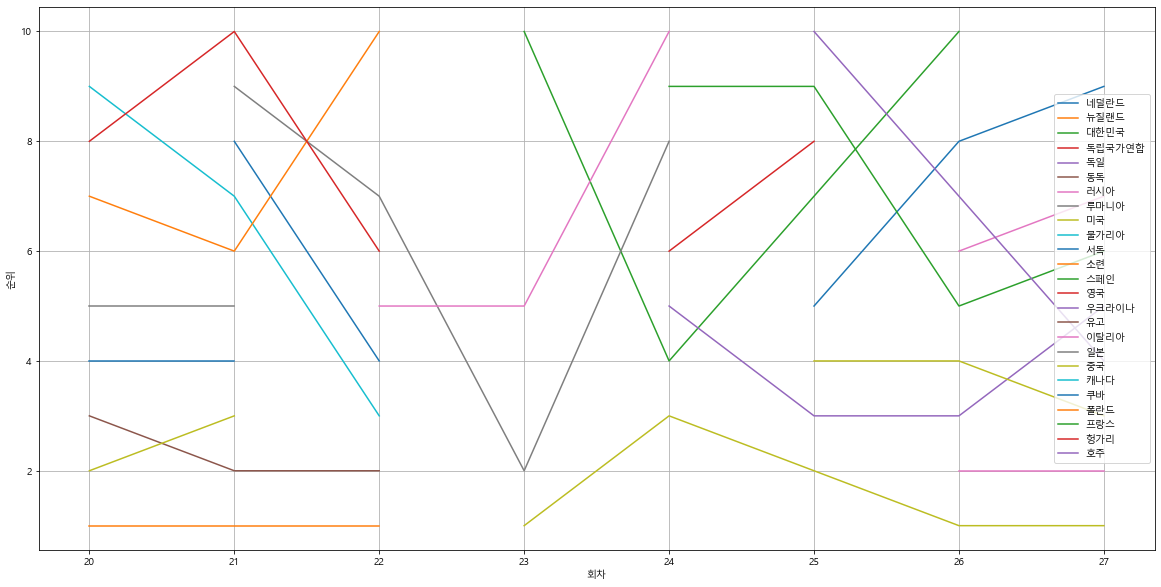

In [166]:
target_col = sorted(list(data["국가"].unique()))
target_col
plt.figure(figsize=(20,10))
plt.plot(data_pivot[target_col])
plt.grid(True)
plt.xlabel("회차")
plt.ylabel("순위")
plt.legend(target_col, loc="right")